In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 256
x_test = x_test.astype('float32') / 256

print(x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [ ]:
x_train = x_train.reshape(len(x_train), 28*28) # reshape을 통해 1차원으로 flatten 시킨다
x_test = x_test.reshape(len(x_test), 28*28)  # reshape을 통해 1차원으로 flatten 시킨다

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
input_layer = Input(shape=(784,)) # 784개의 정보다 input 으로 들어옴
encoded = Dense(64, activation='relu')(input_layer) # 중간 은닉층은 64개의 노드를 가짐. 784개의 정보가 64개의 노드로 다 연결이 됨. 활성함수로는 relu 사용. 
decoded = Dense(784, activation='sigmoid')(encoded) # 이거는 784개의 노드. 활성함수로는 sigmoid 사용. 784개의 정보는 다시 784개의 출력을 갖는 출력 layer로 넘어간다. 
# 입력 == 레이블 (784 == 784)

In [ ]:
autoencoder = Model(input_layer, decoded) 

In [ ]:
encoder = Model(input_layer, encoded) # encoder: 이미지 축소시킴
# decoder: 이미지 팽창시킴

In [ ]:
input_layer_decoder = Input(shape=(64,))
decoder_layer = autoencoder.layers[-1](input_layer_decoder) # 오토인코더의 layer들의 마지막에 있는 것이 결국 decoded 이다. 
decoder = Model(input_layer_decoder,decoder_layer)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # 최적화 기법은 adam 사용 / 손실 함수는 binary_crossentropy 사용
autoencoder.fit(x_train,x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test,x_test)) # 한 번 돌릴 때 256 batch size. 입력==출력 이면 최적
# epoch이 커질 수록 loss가 줄어듦. -> loss function 의 결과가 수렴(converge)하기 시작함. 수렴 값이 대략 0.0737 정도 되는 듯

Epoch 1/50
235/235 [==============================] - 5s 17ms/step - loss: 0.2413 - val_loss: 0.1597
Epoch 2/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1427 - val_loss: 0.1269
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1189 - val_loss: 0.1094
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1047 - val_loss: 0.0983
Epoch 5/50
235/235 [==============================] - 3s 15ms/step - loss: 0.0956 - val_loss: 0.0911
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0895 - val_loss: 0.0862
Epoch 7/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0854 - val_loss: 0.0829
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0825 - val_loss: 0.0806
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0804 - val_loss: 0.0789
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0790 - val_lo

In [ ]:
encoded_images = encoder.predict(x_test) # 압축된 이미지
decoded_images = decoder.predict(encoded_images) # 원상복귀된(팽창된) 이미지

In [ ]:
def visualize(data, size): #8개에 대해서만 시각화
    n = 8
    plt.figure(figsize=(20,4))
    plt.gray()
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(data[i].reshape(size,size)) # reshape으로 2차원으로 바꾸어줌
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

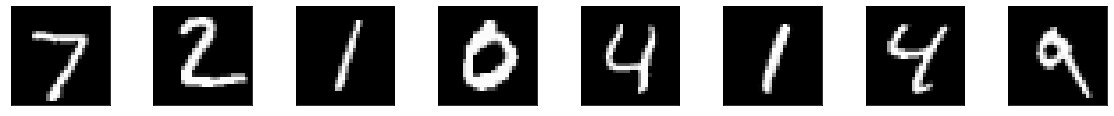

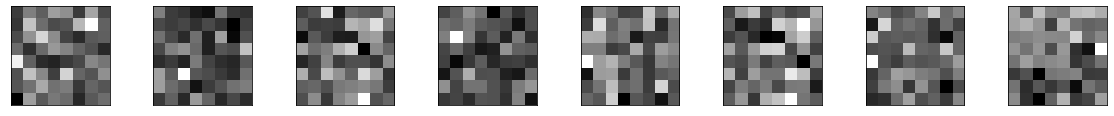

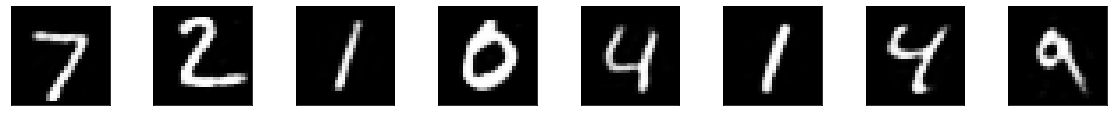

In [ ]:
visualize(x_test, 28) # 딥러닝 같은 기계한테는 784개의 픽셀정보를 써서 숫자를 표현하든, 
visualize(encoded_images, 8) # 64개의 픽셀정보를 써서 숫자를 표현하든 둘 다 똑같다. 하지만 은닉층에서 차원을 줄이면(784->64) 기계가 아닌 사람이 봤을 때는 이미지를 파악하기 힘들다. 
# 물론 차원을 줄이면 계산량이 줄어서 얻는 이점도 있다.
# 그리고 차원을 줄였다고 해서, 기계입장에서는 정보량이 줄지 않는다. 정보량은 똑같이 유지된다. 
visualize(decoded_images, 28) # 이미지 원상 복구